## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  56.484235  1578.798656  0.956031   9.930076  1510.379706
1   7.357827  1478.254346  0.583353   3.254194   862.381173
2  50.277014  1301.058886  0.182397   2.176698   242.312434
3  44.433671  1419.492615  0.508507  10.991768   723.222182
4  77.929745   726.300580  0.269141   9.429468   210.463656


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9715379	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9591759	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9496386	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9391769	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9270534	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9172446	total: 60.6ms	remaining: 10s
6:	learn: 0.9048623	total: 61ms	remaining: 8.65s
7:	learn: 0.8903422	total: 61.6ms	remaining: 7.63s
8:	learn: 0.8790554	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8654136	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8547123	total: 62.8ms	remaining: 5.65s
11:	learn: 0.8404719	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8287162	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8163526	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8050194	total: 64.9ms	remaining: 4.26s
15:	learn: 0.7956972	total: 65.3ms	remaining: 4.01s
16:	learn: 0.7847966	total: 65.8ms	remaining: 3.8s
17:	learn: 0.7749784	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7664111	total: 66.5ms	remaining: 3.4

122:	learn: 0.2182425	total: 115ms	remaining: 822ms
123:	learn: 0.2161438	total: 116ms	remaining: 818ms
124:	learn: 0.2145099	total: 116ms	remaining: 814ms
125:	learn: 0.2125987	total: 117ms	remaining: 809ms
126:	learn: 0.2102452	total: 117ms	remaining: 805ms
127:	learn: 0.2082995	total: 118ms	remaining: 801ms
128:	learn: 0.2065448	total: 118ms	remaining: 796ms
129:	learn: 0.2049337	total: 118ms	remaining: 791ms
130:	learn: 0.2029948	total: 119ms	remaining: 786ms
131:	learn: 0.2016998	total: 119ms	remaining: 782ms
132:	learn: 0.1998022	total: 119ms	remaining: 778ms
133:	learn: 0.1975177	total: 120ms	remaining: 774ms
134:	learn: 0.1956137	total: 120ms	remaining: 771ms
135:	learn: 0.1941277	total: 121ms	remaining: 768ms
136:	learn: 0.1920654	total: 121ms	remaining: 764ms
137:	learn: 0.1903268	total: 122ms	remaining: 761ms
138:	learn: 0.1884358	total: 122ms	remaining: 758ms
139:	learn: 0.1864426	total: 123ms	remaining: 755ms
140:	learn: 0.1846520	total: 123ms	remaining: 751ms
141:	learn: 

241:	learn: 0.0751972	total: 171ms	remaining: 535ms
242:	learn: 0.0746852	total: 171ms	remaining: 533ms
243:	learn: 0.0741569	total: 172ms	remaining: 532ms
244:	learn: 0.0736316	total: 172ms	remaining: 531ms
245:	learn: 0.0731359	total: 173ms	remaining: 529ms
246:	learn: 0.0725861	total: 173ms	remaining: 528ms
247:	learn: 0.0720737	total: 173ms	remaining: 526ms
248:	learn: 0.0714960	total: 174ms	remaining: 524ms
249:	learn: 0.0710543	total: 174ms	remaining: 523ms
250:	learn: 0.0705441	total: 175ms	remaining: 521ms
251:	learn: 0.0699574	total: 175ms	remaining: 520ms
252:	learn: 0.0694542	total: 175ms	remaining: 518ms
253:	learn: 0.0689904	total: 176ms	remaining: 516ms
254:	learn: 0.0685836	total: 176ms	remaining: 515ms
255:	learn: 0.0680292	total: 177ms	remaining: 514ms
256:	learn: 0.0675307	total: 177ms	remaining: 512ms
257:	learn: 0.0670832	total: 178ms	remaining: 511ms
258:	learn: 0.0665992	total: 178ms	remaining: 510ms
259:	learn: 0.0662486	total: 179ms	remaining: 508ms
260:	learn: 

493:	learn: 0.0196507	total: 282ms	remaining: 289ms
494:	learn: 0.0195715	total: 282ms	remaining: 288ms
495:	learn: 0.0195283	total: 283ms	remaining: 287ms
496:	learn: 0.0194479	total: 283ms	remaining: 286ms
497:	learn: 0.0193446	total: 284ms	remaining: 286ms
498:	learn: 0.0192649	total: 284ms	remaining: 285ms
499:	learn: 0.0192189	total: 285ms	remaining: 285ms
500:	learn: 0.0191421	total: 285ms	remaining: 284ms
501:	learn: 0.0190666	total: 286ms	remaining: 283ms
502:	learn: 0.0189905	total: 286ms	remaining: 283ms
503:	learn: 0.0189281	total: 287ms	remaining: 282ms
504:	learn: 0.0188547	total: 287ms	remaining: 282ms
505:	learn: 0.0187818	total: 288ms	remaining: 281ms
506:	learn: 0.0187439	total: 288ms	remaining: 280ms
507:	learn: 0.0186955	total: 289ms	remaining: 280ms
508:	learn: 0.0186257	total: 289ms	remaining: 279ms
509:	learn: 0.0185546	total: 290ms	remaining: 278ms
510:	learn: 0.0185041	total: 290ms	remaining: 278ms
511:	learn: 0.0184009	total: 291ms	remaining: 277ms
512:	learn: 

642:	learn: 0.0103929	total: 353ms	remaining: 196ms
643:	learn: 0.0103643	total: 353ms	remaining: 195ms
644:	learn: 0.0103275	total: 354ms	remaining: 195ms
645:	learn: 0.0102967	total: 354ms	remaining: 194ms
646:	learn: 0.0102612	total: 355ms	remaining: 194ms
647:	learn: 0.0102127	total: 355ms	remaining: 193ms
648:	learn: 0.0101831	total: 356ms	remaining: 192ms
649:	learn: 0.0101542	total: 356ms	remaining: 192ms
650:	learn: 0.0101366	total: 356ms	remaining: 191ms
651:	learn: 0.0100807	total: 357ms	remaining: 190ms
652:	learn: 0.0100635	total: 357ms	remaining: 190ms
653:	learn: 0.0100311	total: 358ms	remaining: 189ms
654:	learn: 0.0099689	total: 358ms	remaining: 189ms
655:	learn: 0.0099150	total: 358ms	remaining: 188ms
656:	learn: 0.0098985	total: 359ms	remaining: 187ms
657:	learn: 0.0098670	total: 359ms	remaining: 187ms
658:	learn: 0.0098067	total: 359ms	remaining: 186ms
659:	learn: 0.0097588	total: 360ms	remaining: 185ms
660:	learn: 0.0097163	total: 360ms	remaining: 185ms
661:	learn: 

885:	learn: 0.0045529	total: 463ms	remaining: 59.6ms
886:	learn: 0.0045316	total: 464ms	remaining: 59.1ms
887:	learn: 0.0045170	total: 464ms	remaining: 58.5ms
888:	learn: 0.0044991	total: 464ms	remaining: 58ms
889:	learn: 0.0044794	total: 465ms	remaining: 57.5ms
890:	learn: 0.0044659	total: 465ms	remaining: 56.9ms
891:	learn: 0.0044467	total: 466ms	remaining: 56.4ms
892:	learn: 0.0044348	total: 466ms	remaining: 55.9ms
893:	learn: 0.0044203	total: 467ms	remaining: 55.4ms
894:	learn: 0.0044018	total: 467ms	remaining: 54.8ms
895:	learn: 0.0043914	total: 468ms	remaining: 54.3ms
896:	learn: 0.0043754	total: 468ms	remaining: 53.8ms
897:	learn: 0.0043559	total: 469ms	remaining: 53.3ms
898:	learn: 0.0043442	total: 469ms	remaining: 52.7ms
899:	learn: 0.0043314	total: 470ms	remaining: 52.2ms
900:	learn: 0.0043165	total: 470ms	remaining: 51.7ms
901:	learn: 0.0042985	total: 471ms	remaining: 51.2ms
902:	learn: 0.0042719	total: 471ms	remaining: 50.6ms
903:	learn: 0.0042565	total: 472ms	remaining: 50

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


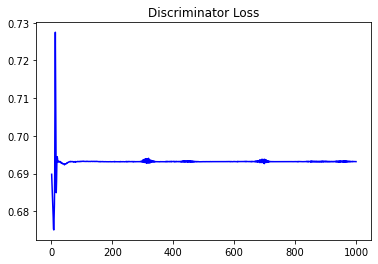

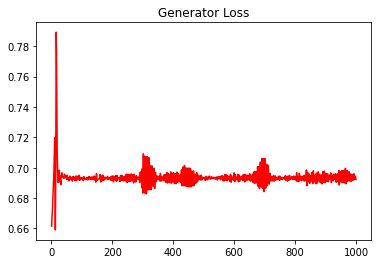

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.012687850035182939


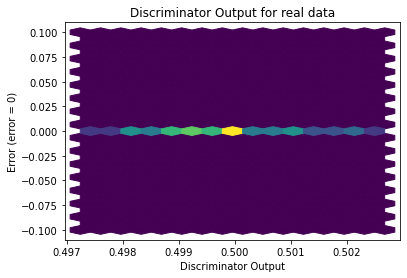

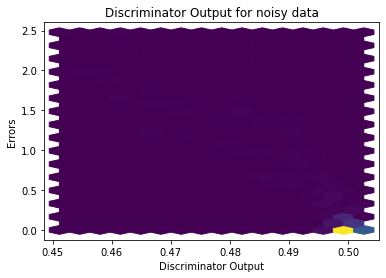

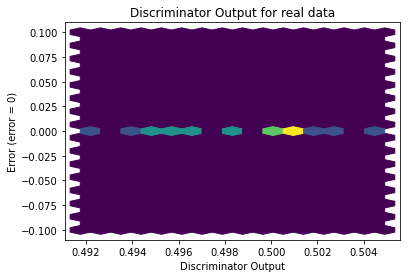

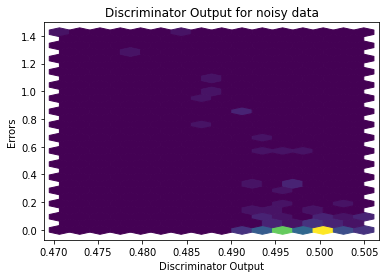

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5653]], requires_grad=True)
